In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.circuit import Gate
from qiskit.visualization import plot_histogram,circuit_drawer
from qiskit_aer import Aer
from qiskit.circuit.library import IGate
#from qiskit_aer import Aer
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

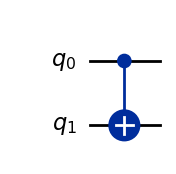

In [2]:
#Oracle implementation 
inner = QuantumCircuit(2,name = 'Uf')

# The function which will be implemented by the Oracle must be uncommented

# Constant 0
# nothing

# Constant 1
#inner.x(1) 

# Balanced: output flips if x = 1
inner.cx(0,1) 

# Balanced: output flips if x = 0
# inner.x(0) 
# inner.cx(0,1) 
# inner.x(0) 

inner.draw('mpl')

In [3]:
# Create a quantum circuit with 2 qubit and 1 classical bit
qc = QuantumCircuit(2,1)

qc.h([0])
# Deutsch's 'classic'
#qc.x(1) 
#qc.h(1) 

#Convert the Oracle circuit into a gate and add it to the circuit
uf = inner.to_gate(label='Uf')
qc.append(uf,[0,1])

qc.h([0])

qc.barrier()
qc.measure(0,0)

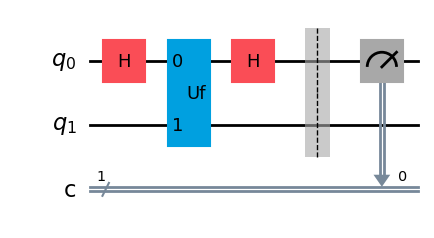

In [4]:
# Custom style so that the Oracle is displayed in a different color
style = {
    'displaycolor': {
        'Uf': ("#00a0e0", "#000000")  
    }
}
qc.draw('mpl', style=style)

In [5]:
# Use the Aer simulator to run the circuit
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(qc.decompose(), shots=512)  

# Get the results
result = job.result()
counts = result.get_counts(qc)

# Print the counts
print("Measurement outcomes:", counts)

Measurement outcomes: {'1': 246, '0': 266}
